<a href="https://colab.research.google.com/github/yath473/Skin-Cancer-Detection-Project/blob/main/Yathaarth_Singh_Student_SkinCancerDiagnosis_Module2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Module 2a

# *Online Dermatologists:* 📱 🌐 Diagnosing Skin Cancer through a Web Application

In this project, we will be be diagnosing skin lesion images for signs of skin cancer. To perform this task, we'll be working with an array of machine learning methods and models.

We're hoping that our model might be useful to people who don't have easy access to medical professionals. For that, it'll need to be both highly accurate and easily accessible! Yesterday's simple models didn't perform well enough for this job.

In this notebook we'll be:
*   Developing more complex ML models using Convolutional Neural Networks
*   Deploying our ML models to a web app

# Set up our Environment

In [ ]:
#@title Run this to download data and prepare our environment.{ display-mode: "form" }
print("Installing packages...")
!pip install -U folium==0.2.1
!pip install -U packaging==20.9
!pip install hypopt tensorflowjs > /dev/null
print("Downloading files...")
!wget https://www.dropbox.com/s/fedqcdt4o0m2oxp/X.npy &> /dev/null
!wget https://www.dropbox.com/s/h7xh92w1w7px30a/X_g.npy &> /dev/null
!wget https://www.dropbox.com/s/grn9brfvzx74c8a/y.npy &> /dev/null
print("Importing stuff...")
import os
os.makedirs("static/js", exist_ok=True)
!wget -O static/js/skin_cancer_diagnosis_script.js 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20(Healthcare%20B)%20Skin%20Cancer%20Diagnosis/skin_cancer_diagnosis_script.js' &> /dev/null
output = 'static/js/skin_cancer_diagnosis_script.js'

from google.colab.output import eval_js

import time
start_time = time.time()

from tqdm.notebook import tqdm

!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2
import tensorflow as tf

import keras.api.keras as keras
!pip install git+https://github.com/rdk2132/scikeras # workaround for scikeras deprecation
import scikeras
from scikeras.wrappers import KerasClassifier
from keras import backend as K
from keras.layers import *
from keras.models import Sequential
from keras import backend as K
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import random
from PIL import Image
import gdown

import argparse
import numpy as np
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.layers import add, concatenate
from keras.models import Model
from keras.utils.np_utils import to_categorical
import struct
from google.colab.patches import cv2_imshow
from copy import deepcopy
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from keras.applications.mobilenet import MobileNet

from hypopt import GridSearch

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import cv2


import tensorflowjs as tfjs

from google.colab import files

import requests, io, zipfile
import os



import os.path
from os import path




print("Done!")

Installing packages...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Importing stuff...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 18 kB/s 
     |████████████████████████████████| 462 kB 5.1 MB/s 
     |████████████████████████████████| 5.8 MB 24.7 MB/s 
     |████████████████████████████████| 1.4 MB 69.5 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.0
    Uninstalling tensorboard-2.9.0:
      Successfully uninstalled tensorboard-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.0
    Uninstalling tensorfl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 47 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 7s (61.0 MB/s)
(Reading database ... 155653 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155631 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+c

In [ ]:
IMG_WIDTH = 100
IMG_HEIGHT = 75

Let's load in our data from last time!

In [ ]:
X = np.load("X.npy")
X_g = np.load("X_g.npy")
y = np.load("y.npy")

In [ ]:
#@title Run this to Perform Data Augmentation { display-mode: "form" }
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
X_g_train, X_g_test, y_train, y_test = train_test_split(X_g, y, test_size=0.4, random_state=101)

X_augmented = []
X_g_augmented = []

y_augmented = []

for i in tqdm(range(len(X_train))):
  transform = random.randint(0,1)
  if (transform == 0):
    # Flip the image across the y-axis
    X_augmented.append(cv2.flip(X_train[i],1))
    X_g_augmented.append(cv2.flip(X_g_train[i],1))
    y_augmented.append(y_train[i])
  else:
    # Zoom 33% into the image
    zoom = 0.33

    centerX,centerY=int(IMG_HEIGHT/2),int(IMG_WIDTH/2)
    radiusX,radiusY= int((1-zoom)*IMG_HEIGHT*2),int((1-zoom)*IMG_WIDTH*2)

    minX,maxX=centerX-radiusX,centerX+radiusX
    minY,maxY=centerY-radiusY,centerY+radiusY

    cropped = (X_train[i])[minX:maxX, minY:maxY]
    new_img = cv2.resize(cropped, (IMG_WIDTH, IMG_HEIGHT))
    X_augmented.append(new_img)

    cropped = (X_g_train[i])[minX:maxX, minY:maxY]
    new_img = cv2.resize(cropped, (IMG_WIDTH, IMG_HEIGHT))
    X_g_augmented.append(new_img)

    y_augmented.append(y_train[i])

X_augmented = np.array(X_augmented)
X_g_augmented = np.array(X_g_augmented)

y_augmented = np.array(y_augmented)

X_train = np.vstack((X_train,X_augmented))
X_g_train = np.vstack((X_g_train,X_g_augmented))

y_train = np.append(y_train,y_augmented)

  0%|          | 0/580 [00:00<?, ?it/s]

Let's view the shape of our training variables after data augmentation:

In [ ]:
X.shape



(967, 75, 100, 3)

# Creating Machine Learning Models

**Now**, let's explore some alternative classification options.

Let's take a look at Convolutional Neural Networks. These machine learning models are tailor made to work with images through the use of *Convolutional Layers*.

CNNs contain several kinds of layers; some of the most important are the *Convolutional Layers*, *Pooling Layers*, and *Fully Connected Layers*.

The Convolutional Layer is used to extract features from the image through the use of a sliding window, known as a kernel.


![alt text](https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png?1c517e00cb8d709baf32fc3d39ebae67)


The Pooling Layer reduces the dimensions of the image, and extracts the most important features. This layer is very useful in minimizing overfitting, as a lot of the features that are too specific to the training data will be discarded in this step.

![alt text](https://miro.medium.com/max/875/1*KQIEqhxzICU7thjaQBfPBQ.png)

Finally, after multiple iterations of Convolutional and Pooling Layers, the image is converted to a classification probability in the fully connected layer. The fully connected layer is architecturally similar to a traditional neural network. The input to this component is our flattened image (after all the transformations from the Convolutional and Pooling layers are applied), and the outputs are the predictions.


![alt text](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/74_blog_image_1.png)


In [ ]:
# Your Response Here



We'll use the the library Keras to create the models for our skin lesion classification. Let's start off by creating our own CNN model (This is the same model we used in the earlier Intro to CNNs notebook). We can work with our color images with the CNNs.

Take a look at the CNN's definition below.

**Question**: How is the model organized? Could you draw a diagram of its structure?

In [ ]:
# epochs = indicates the number of passes of the entire training dataset the machine learning algorithm has completed(Each datatset in Python is seperated into batches/layers).
# droput - used to fix overfitting



In [ ]:
def CNNClassifier(epochs=20, batch_size=10, layers=5, dropout=0.5, activation='relu'):
  def set_params():
    i = 1
  def create_model():
    model = Sequential()

    for i in range(layers):
      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation(activation))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout / 2.0))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation(activation))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout / 2.0))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation(activation))
    model.add(Dropout(dropout))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    # Let's train the model using RMSprop
    return model
  opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
  return KerasClassifier(model=create_model, optimizer=opt, loss='categorical_crossentropy', epochs=epochs, batch_size=batch_size, verbose=1, validation_batch_size=batch_size, validation_split=.4, metrics=['accuracy'])

Some terms you might notice include Epochs, Batch Size, Learning Rate, Dropout, and Activation functions:


*   Dropout is a method of preventing overfitting by randomly ignoring certain neurons from the model during training.
*   Activation functions determine how a neuron calculates its output after adding up its weighted inputs.
*   Epochs are just the number of iterations we would like to train our model for.
*   Batch Size is the number of samples we would like to send through the model at a time.
*   The Learning Rate is a hyperparameter that affects how quickly the model changes to adapt to the training data.

Phew, that was a lot of terms!

**Question:** With your knowledge so far, what values would you set these parameters to be? What might your model's architecture look like?

In [ ]:
# Your Response Here

We also need to transform our y labels into one hot encoded labels for training.

In [ ]:
y_train_onehot = np.zeros((y_train.size, y_train.max().astype(int)+1))
y_train_onehot[np.arange(y_train.size),y_train.astype(int)] = 1

y_test_onehot = np.zeros((y_test.size, y_test.max().astype(int)+1))
y_test_onehot[np.arange(y_test.size),y_test.astype(int)] = 1

Let's initialize and train our CNN. This may take a while to execute as well.

In [ ]:
cnn = CNNClassifier()

cnn.fit(X_train.astype(np.float32), y_train_onehot.astype(np.float32),
        validation_data=(X_test.astype(np.float32),y_test_onehot.astype(np.float32))
        ,verbose=1)

Epoch 1/20


UnimplementedError: ignored

Let's save and download our trained model, so that we can use it in a web app later on.

In [ ]:
tfjs.converters.save_keras_model(cnn.model_, 'cnn_model')

**Let's evaluate our model's performance!** Let's start by defining our `model_stats()` and `plot_cm()` functions.

In [ ]:
#@title Click here to define `model_stats()`! { display-mode: "form" }
def model_stats(name, y_test, y_pred, y_pred_proba):
  y_pred_1d = [0] * len(y_test)
  for i in range(len(y_test)):
    y_pred_1d[i] = np.where(y_pred[i] == 1)[0][0]

  cm = confusion_matrix(y_test, y_pred_1d)

  print(name)

  accuracy = accuracy_score(y_test,y_pred_1d)
  print ("The accuracy of the model is " + str(round(accuracy,5)))

  y_test_onehot = np.zeros((y_test.size, y_test.max().astype(int)+1))
  y_test_onehot[np.arange(y_test.size),y_test.astype(int)] = 1

  roc_score = roc_auc_score(y_test_onehot, y_pred_proba)

  print ("The ROC AUC Score of the model is " + str(round(roc_score,5)))

  return cm

How can we use this function to evaluate our model? Code your answer below!

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_proba = cnn.predict_proba(X_test)

cnn_cm = model_stats("CNN",y_test, y_pred, y_pred_proba)



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


UnimplementedError: ignored

In [ ]:
#@title Let's also redefine the `plot_cm()` function from our first notebook. { display-mode: "form" }
def plot_cm(name, cm):
  classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

  df_cm = pd.DataFrame(cm, index = [i for i in classes], columns = [i for i in classes])
  df_cm = df_cm.round(5)

  plt.figure(figsize = (12,8))
  sns.heatmap(df_cm, annot=True, fmt='g')
  plt.title(name + " Model Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

Let's use the function to plot a confusion matrix of our model!

In [ ]:
plot_cm("CNN", cnn_cm)



NameError: ignored

It looks like our custom CNN's performance is better than the KNN and Decision Tree models. More training epochs or a bigger dataset would probably help with the performance.

Try building your own CNN! Let's see who can get the best performance in your group!

### First, define your model here!

In [ ]:
def CNNClassifier_Modified(epochs=20, batch_size=10, layers=5, dropout=0.5, activation='relu'):
  def set_params():
    i = 1
  def create_model():
    model = Sequential()

    # Your Code Here
    model.add(Flatten())
    model.add(Dense(7))
    model.add(Activation('softmax'))

    return model
  # Let's train the model using RMSprop
  opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
  return KerasClassifier(model=create_model, optimizer=opt, loss='categorical_crossentropy', epochs=epochs, batch_size=batch_size, verbose=1, validation_batch_size=batch_size, validation_split=.4, metrics=[keras.metrics.AUC()])

### Then, run the code below to train your model.

In [ ]:
cnn = CNNClassifier_Modified()

cnn.fit(X_train.astype(np.float32), y_train_onehot.astype(np.float32),
        validation_data=(X_test.astype(np.float32),y_test_onehot.astype(np.float32))
        ,verbose=1)

Epoch 1/20
103/116 [=========================>....] - ETA: 0s - loss: 431.9015 - auc: 0.5183WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f11f47203b0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x7f1238656c50>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x7f1238656c50>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x7f1238656c50>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
116/116 [==============================] - 3s 7ms/step - loss: 430.3615 - auc: 0.5145 - val_loss: 530.2952 - val_auc: 0.5085
Epoch 2/20
116/116 [==============================] - 1s 5ms/step - loss: 331.2132 - auc: 0.5431 - val_loss: 319.4219 - val_auc: 0.5873
Epoch 3/20
116/116 [==============================] - 1s 4ms/step - loss: 320.9236 - auc: 0.5642 - val_loss: 196.3454 - val_auc: 0.5841
Epoch 4/20
116/116 [==============================] - 1s 4ms/step - loss: 297.7950 - auc: 0.5737 - val_loss: 491.9218 - val_auc: 0.5087
Epoch 5/20
116/116 [==============================] - 1s 5ms/step - loss: 304.0201 - auc: 0.5670 - val_loss: 261.8304 - val_auc: 0.5998
Epoch 6/

KerasClassifier(
	model=<function CNNClassifier_Modified.<locals>.create_model at 0x7f12382ab320>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=<keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f12383aa0d0>
	loss=categorical_crossentropy
	metrics=[<keras.metrics.metrics.AUC object at 0x7f12383aa850>]
	batch_size=10
	validation_batch_size=10
	verbose=1
	callbacks=None
	validation_split=0.4
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)

### Next, let's evaluate your model's performance!

In [ ]:
y_pred = cnn.predict(X_test)
y_pred_proba = cnn.predict_proba(X_test)
cnn_cm = model_stats("CNN",y_test,y_pred,y_pred_proba)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
39/39 [==============================] - 0s 2ms/step
CNN
The accuracy of the model is 0.34625
The ROC AUC Score of the model is 0.62561


### Finally, we can plot our confusion matrix below.

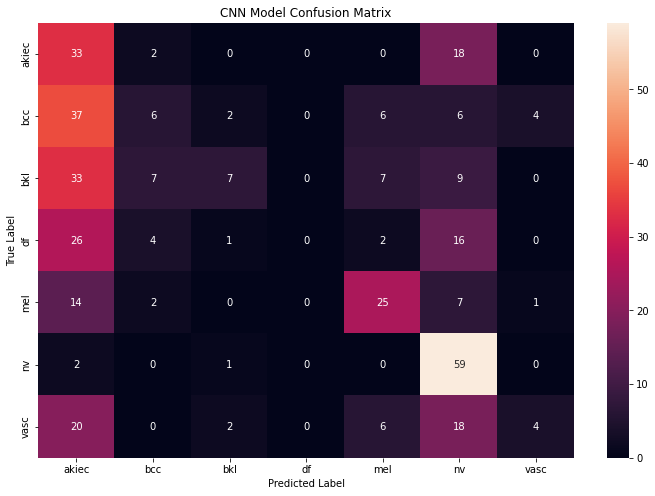

In [ ]:
plot_cm("CNN", cnn_cm)

Let's try using a grid search with our CNN. A note to instructors, this section may take a long time to execute so it's better if students come back to this portion on their own time.

In the variable `param_grid` we can specify which parameters in our CNN we want to modify.

In [ ]:
param_grid = {
              'epochs' :              [10, 20, 30],
              'batch_size' :          [32, 64,128],
              'layers' :              [1, 3, 5],
              'dropout' :             [0.2, 0.3, 0.5],
              'activation' :          ['relu', 'elu']
             }

With this parameter grid we would be training 162 different models! This is because the total number of hyperparameter combinations is calculated as `3 * 3 * 3 * 3 * 2`. For testing out our grid search, let's redefine our parameter grid to just have four possible combinations.



In [ ]:
# Your Code Here





Let's create a validation slice in our dataset.

In [ ]:
X_test_small, X_val, y_test_small, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

Here we've created a class for our Grid Search Classifier that can be used by the hypopt library for generating various models with different hyperparameters.

In [ ]:
#@title Run this to Define our Grid Search CNN Class { display-mode: "form" }
class gridSearchCNN():

    keras_model = None
    model = Sequential()
    #epochs=10
    epochs=1
    batch_size=10
    layers=5
    dropout=0.5
    activation='relu'

    def __init__(self, **params):
      pass

    def fit(self, X, y, sample_weight = None):
        print("fitting")
        self.keras_model.fit(X,y)
        print("fitted")
        return self.keras_model
    def predict(self, X):
        return self.keras_model.predict(X)
    def predict_proba(self, X):
        return self.keras_model.predict_proba(X)
    def score(self, X, y, sample_weight = None):
        print("scoring")
        #return self.keras_model.score(X,y)
        y_pred_proba = self.keras_model.predict_proba(X)
        roc_auc_score_val = roc_auc_score(y, y_pred_proba)
        print("scored")
        return roc_auc_score_val


    def createKerasCNN(self,):

      def create_model():
        self.model = Sequential()

        for i in range(self.layers):
          self.model.add(Conv2D(64, (3, 3), padding='same'))
          self.model.add(Activation(self.activation))

        self.model.add(Conv2D(64, (3, 3)))
        self.model.add(Activation(self.activation))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(self.dropout / 2.0))

        self.model.add(Conv2D(128, (3, 3), padding='same'))
        self.model.add(Activation(self.activation))
        self.model.add(Conv2D(128, (3, 3)))
        self.model.add(Activation(self.activation))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(self.dropout / 2.0))

        self.model.add(Flatten())
        self.model.add(Dense(512))
        self.model.add(Activation(self.activation))
        self.model.add(Dropout(self.dropout))
        self.model.add(Dense(7))
        self.model.add(Activation('softmax'))

        return self.model

      opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
      return KerasClassifier(model=create_model, optimizer=opt, loss='categorical_crossentropy', epochs=self.epochs, batch_size=self.batch_size, verbose=1, validation_batch_size=self.batch_size, validation_split=.4, metrics=[keras.metrics.AUC()])

    def get_params(self, deep = True):
        return {
            'epochs': self.epochs,
            'batch_size': self.batch_size,
            'layers': self.layers,
            'dropout': self.dropout,
            'activation': self.activation
            }

    def set_params(self, **params):
      if 'epochs' in params.keys():
        self.epochs = params['epochs']
      if 'batch_size' in params.keys():
        self.batch_size = params['batch_size']
      if 'layers' in params.keys():
        self.layers = params['layers']
      if 'dropout' in params.keys():
        self.dropout = params['dropout']
      if 'activation' in params.keys():
        self.activation = params['activation']

      self.keras_model = self.createKerasCNN()
      return self

Now let's implement our grid search to identify our optimal model parameters.

**Note:** This may take very long to run (around 11 minutes), so it might be a good idea to come back to this later.

In [ ]:
gs = GridSearch(model=gridSearchCNN(),param_grid=param_grid,parallelize=False)
# Your Code Here

# End Code
y_train_onehot = np.zeros((y_train.size, y_train.max().astype(int)+1))
y_train_onehot[np.arange(y_train.size),y_train.astype(int)] = 1

y_val_onehot = np.zeros((y_val.size, y_val.max().astype(int)+1))
y_val_onehot[np.arange(y_val.size),y_val.astype(int)] = 1

gs.fit(X_train.astype(np.float32), y_train_onehot.astype(np.float32), X_val.astype(np.float32), y_val_onehot.astype(np.float32),verbose=1)


Comparing 162 parameter setting(s) using 2 CPU thread(s) ( 81 job(s) per thread ).
fitting
Epoch 1/10
fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_15/conv2d_92/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asynci

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_16/conv2d_96/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asynci

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_17/conv2d_102/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_18/conv2d_110/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_19/conv2d_114/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_20/conv2d_120/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_21/conv2d_128/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_22/conv2d_132/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_23/conv2d_138/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_24/conv2d_146/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_25/conv2d_150/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_26/conv2d_156/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_27/conv2d_164/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_28/conv2d_168/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_29/conv2d_174/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_30/conv2d_182/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_31/conv2d_186/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_32/conv2d_192/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_33/conv2d_200/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_34/conv2d_204/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_35/conv2d_210/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_36/conv2d_218/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_37/conv2d_222/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_38/conv2d_228/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_39/conv2d_236/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_40/conv2d_240/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_41/conv2d_246/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_42/conv2d_254/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_43/conv2d_258/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_44/conv2d_264/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_45/conv2d_272/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_46/conv2d_276/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_47/conv2d_282/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_48/conv2d_290/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_49/conv2d_294/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_50/conv2d_300/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_51/conv2d_308/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_52/conv2d_312/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_53/conv2d_318/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_54/conv2d_326/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_55/conv2d_330/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_56/conv2d_336/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_57/conv2d_344/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_58/conv2d_348/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_59/conv2d_354/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_60/conv2d_362/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_61/conv2d_366/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_62/conv2d_372/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_63/conv2d_380/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_64/conv2d_384/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_65/conv2d_390/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_66/conv2d_398/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_67/conv2d_402/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_68/conv2d_408/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_69/conv2d_416/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_70/conv2d_420/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_71/conv2d_426/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_72/conv2d_434/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_73/conv2d_438/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_74/conv2d_444/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_75/conv2d_452/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_76/conv2d_456/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_77/conv2d_462/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_78/conv2d_470/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_79/conv2d_474/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_80/conv2d_480/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_81/conv2d_488/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_82/conv2d_492/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_83/conv2d_498/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_84/conv2d_506/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_85/conv2d_510/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_86/conv2d_516/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_87/conv2d_524/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_88/conv2d_528/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_89/conv2d_534/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_90/conv2d_542/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_91/conv2d_546/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_92/conv2d_552/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_93/conv2d_560/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_94/conv2d_564/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_95/conv2d_570/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_96/conv2d_578/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_97/conv2d_582/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_98/conv2d_588/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_99/conv2d_596/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/async

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_100/conv2d_600/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_101/conv2d_606/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_102/conv2d_614/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_103/conv2d_618/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_104/conv2d_624/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_105/conv2d_632/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_106/conv2d_636/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_107/conv2d_642/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_108/conv2d_650/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_109/conv2d_654/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_110/conv2d_660/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30
fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_112/conv2d_672/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_113/conv2d_678/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_114/conv2d_686/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_115/conv2d_690/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_116/conv2d_696/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20
fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_118/conv2d_708/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_119/conv2d_714/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_120/conv2d_722/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_121/conv2d_726/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_122/conv2d_732/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_123/conv2d_740/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_124/conv2d_744/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_125/conv2d_750/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_126/conv2d_758/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_127/conv2d_762/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_128/conv2d_768/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_129/conv2d_776/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_130/conv2d_780/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_131/conv2d_786/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_132/conv2d_794/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_133/conv2d_798/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_134/conv2d_804/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_135/conv2d_812/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_136/conv2d_816/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_137/conv2d_822/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_138/conv2d_830/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_139/conv2d_834/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_140/conv2d_840/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_141/conv2d_848/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_142/conv2d_852/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_143/conv2d_858/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_144/conv2d_866/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_145/conv2d_870/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_146/conv2d_876/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_147/conv2d_884/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_148/conv2d_888/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_149/conv2d_894/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_150/conv2d_902/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_151/conv2d_906/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_152/conv2d_912/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_153/conv2d_920/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_154/conv2d_924/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_155/conv2d_930/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_156/conv2d_938/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_157/conv2d_942/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_158/conv2d_948/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_159/conv2d_956/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_160/conv2d_960/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_161/conv2d_966/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_162/conv2d_974/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_163/conv2d_978/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_164/conv2d_984/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_165/conv2d_992/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_166/conv2d_996/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asyn

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_167/conv2d_1002/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asy

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_168/conv2d_1010/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asy

fitting
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_169/conv2d_1014/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asy

fitting
Epoch 1/20
fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_171/conv2d_1028/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asy

fitting
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_172/conv2d_1032/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asy

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_173/conv2d_1038/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asy

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_174/conv2d_1046/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asy

fitting
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/hypopt/model_selection.py:174: UserWarning: ERROR in thread<_MainProcess(MainProcess, started)>with exception:
Graph execution error:

Detected at node 'sequential_175/conv2d_1050/Conv2D' defined at (most recent call last):
    File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.7/asy

TypeError: ignored

Let's evaluate our model with our testing dataset.

In [ ]:
# Your Code Here




Let's also plot the confusion matrix.

In [ ]:
# Your Code Here


#Transfer Learning

Now, let's try implementing *transfer learning.* This a form of machine learning where we take an existing pre-trained network and modify the weights for the top level neurons by training on our dataset. Here, we'll use the MobileNet model as a basis for our model.

In [ ]:
def transfer_learning_model():
  mobilenet_model = MobileNet(input_shape=(IMG_HEIGHT,IMG_WIDTH,3), include_top=False, pooling="max")

  transfer_model = Sequential()
  transfer_model.add(mobilenet_model)
  transfer_model.add(Dropout(0.1))
  transfer_model.add(BatchNormalization())
  transfer_model.add(Dense(256, activation="relu"))
  transfer_model.add(Dropout(0.1))
  transfer_model.add(BatchNormalization())
  transfer_model.add(Dense(7, activation="softmax"))

  return transfer_model

We no longer need the validation dataset as we aren't tweaking any hyperparameters anymore, so we can use our original, bigger `X_test` dataset that includes the validation data.

Let's confirm that our training and testing variables are the right shapes. Once again, we'll use the one-hot encoded variables for the output: `y_test_roc` and `y_train_roc`.

Let's define our `transfer_model` and train it below!

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
transfer_model = KerasClassifier(model=transfer_learning_model, optimizer=opt, loss='categorical_crossentropy', epochs=20, batch_size=10, verbose=1, validation_batch_size=10, validation_split=.2, metrics=[keras.metrics.AUC()])
# Your Code Here


Let's also observe its performance:

In [ ]:
# Your Code Here




Let's take a look at the confusion matrix.

In [ ]:
# Your Code Here


Great, looks like this model performed the best! **Question:** Why would that be?

In [ ]:
# Your Response Here




Now that we've created our model, let's save it to a file we can load up later.

In [ ]:
tfjs.converters.save_keras_model(transfer_model.model_, 'transfer_model')

 Now, the model should be saved to your computer through your browser. Unfortunately, tensorflowjs doesn't support this version of MobileNet, so we'll have to use our first CNN model for the website deployment.

Great work! We've just developed various ML models to perform classification on our skin lesion dataset! Now, our next step is to package this model into a mobile application. Run the code cell below.

In [ ]:
!zip -r ./cnn_model.zip ./cnn_model/

After the line of code above finishes executing, click on the folder icon on the left, click the three dots to the left of ```cnn_model.zip```, and download it to your computer. Downloading might take a while! If you choose to deploy your model on the web, you'll be uploading this file to colab notebook 2b so that you can deploy our first CNN model!